# Histograms from 3D-EBSD

### Import packages

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import h5py
import pandas as pd

C:\Users\GlassDesktop\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


# 3D grains

### Data loading from dream3d file:

In [2]:
def read_dream3d_file(file_path, dataset_name):
    with h5py.File(file_path, 'r') as file:
        # Access different groups and datasets within the HDF5 file
        group = file['DataContainers/ImageDataContainer/CellFeatureData']
        dataset = group[dataset_name]

        # Extract data as needed
        data = dataset[...]

        return data

In [3]:
## Add here the path and name of your dream3d file
file_BA = '3D/BA_3D/BA_microstructure_cleanfilled_grainshape.dream3d'
file_NoBA = '3D/NoBA_3D/NoBA_microstructure_cleanfilled_grainshape.dream3d'

## Add here the name of the arrays you want to plot
eqdiameterBA = read_dream3d_file(file_BA, 'EquivalentDiameters')
eqdiameterNoBA = read_dream3d_file(file_NoBA, 'EquivalentDiameters')

largestareaBA = read_dream3d_file(file_BA, 'LargestCrossSectionsXY')
largestareaNoBA = read_dream3d_file(file_NoBA, 'LargestCrossSectionsXY')

sphericityBA = read_dream3d_file(file_BA, 'Sphericity')
sphericityNoBA = read_dream3d_file(file_NoBA, 'Sphericity')

## Add here the name of the images of histograms to be exported
output_filename_3DEBSD = 'eqdiameters_histogram_3DEBSD.png'
output_filename_area = 'largestarea_histogram_3DEBSD.png'
output_filename_sphericity = 'sphericity_histogram_3DEBSD.png'

## Plot the histograms

### Equivalent diameter

If necessary, apply a threshold

In [4]:
threshold = 5
dataBA = eqdiameterBA[eqdiameterBA >= threshold]
dataNoBA = eqdiameterNoBA[eqdiameterNoBA >= threshold]

In [5]:
sns.set(style="white")

plt.rcParams.update({'font.size': 16})  # Adjust the font size as needed

sns.histplot(dataBA, color='black', binwidth=14,alpha=0.7,edgecolor='black', kde=False, label='IA grain') # alpha=0.5, 
sns.histplot(dataNoBA, binwidth=14,alpha=0.7,edgecolor='darkblue',  kde=False, label='No IA grains') # alpha=0.5, 
plt.axvline(x=threshold, color='red', linestyle='--', label=f'Threshold: {threshold}')

# Set x-axis and y-axis range
plt.xlim(0, 120)
#plt.ylim(0,2000)

    # Set labels and title with larger font size
plt.xlabel('Equivalent diameter (µm)', fontsize=22)
plt.ylabel('Number of grains', fontsize=22)
#plt.title('Grain size comparison', fontsize=22)

    # Add a legend with larger font size
plt.legend(fontsize=16)

    # Save the plot as a PNG file in the same folder where the Jupyter notebook is
plt.savefig(output_filename_3DEBSD, dpi=300, bbox_inches='tight')

    # Show the plot
plt.grid(True)
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


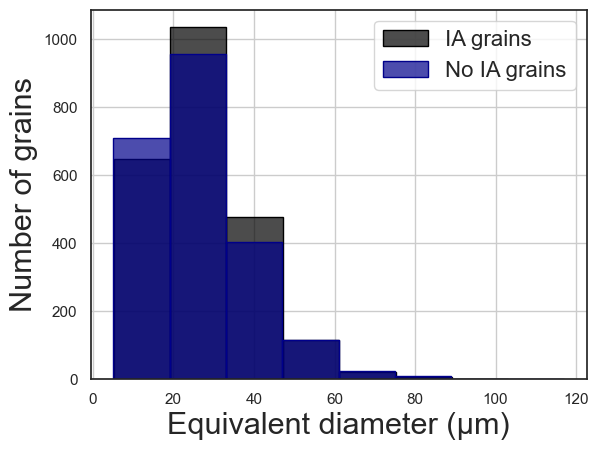

In [6]:
# sphericity histograms Without threshold

sns.set(style="white")
sns.set_palette(["black", "darkblue"])  # Ensure colors remain correct

plt.rcParams.update({'font.size': 16})

sns.histplot(dataBA, color='black', binwidth=14, alpha=0.7, edgecolor='black', kde=False, label='IA grains', multiple="layer")
sns.histplot(dataNoBA, color='darkblue', binwidth=14, alpha=0.7, edgecolor='darkblue', kde=False, label='No IA grains', multiple="layer")

#plt.xlim(0, 1)
plt.xlabel('Equivalent diameter (µm)', fontsize=22)
plt.ylabel('Number of grains', fontsize=22)

plt.legend(fontsize=16)
plt.savefig(output_filename_3DEBSD, dpi=300, bbox_inches='tight')

plt.grid(True)
plt.show()


### Sphericity

In [7]:
threshold = 1
dataBA = sphericityBA[sphericityBA <= threshold]
dataNoBA = sphericityNoBA[sphericityNoBA <= threshold]

In [8]:
sns.set(style="white")

plt.rcParams.update({'font.size': 16})  # Adjust the font size as needed


sns.histplot(dataBA, color='black', binwidth=0.05,alpha=0.7,edgecolor='black', kde=False, label='IA grains') # alpha=0.5, 
sns.histplot(dataNoBA, binwidth=0.05,alpha=0.7,edgecolor='darkblue',  kde=False, label='No IA grains') # alpha=0.5, 
plt.axvline(x=threshold, color='red', linestyle='--', label=f'Threshold: {threshold}')

# Set x-axis and y-axis range
#plt.xlim(0, 1)
#plt.ylim(0,100)

    # Set labels and title with larger font size
plt.xlabel('Sphericity', fontsize=22)
plt.ylabel('Number of grains', fontsize=22)
#plt.title('Grain size comparison', fontsize=22)

    # Add a legend with larger font size
plt.legend(fontsize=16)

    # Save the plot as a PNG file in the same folder where the Jupyter notebook is
plt.savefig(output_filename_sphericity, dpi=300, bbox_inches='tight')

    # Show the plot
plt.grid(True)
plt.show()



C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


In [9]:
# sphericity histograms Without threshold

sns.set(style="white")
sns.set_palette(["black", "darkblue"])  # Ensure colors remain correct

plt.rcParams.update({'font.size': 16})

sns.histplot(dataBA, color='black', binwidth=0.05, alpha=0.7, edgecolor='black', kde=False, label='IA grains', multiple="layer")
sns.histplot(dataNoBA, color='darkblue', binwidth=0.05, alpha=0.7, edgecolor='darkblue', kde=False, label='No IA grains', multiple="layer")

#plt.xlim(0, 1)
plt.xlabel('Sphericity', fontsize=22)
plt.ylabel('Number of grains', fontsize=22)

plt.legend(fontsize=16)
plt.savefig(output_filename_sphericity, dpi=300, bbox_inches='tight')

plt.grid(True)
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


### Largest area along XY slices

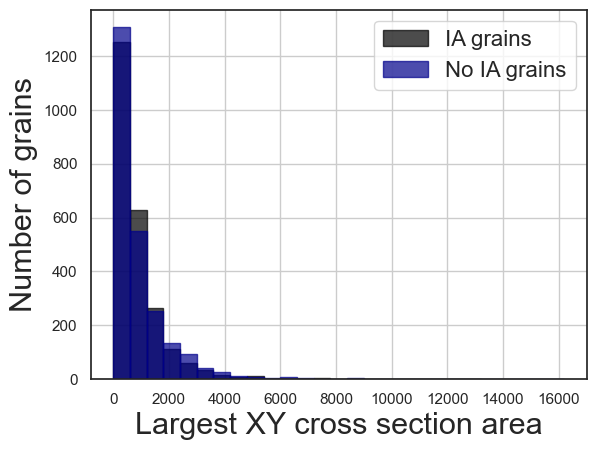

In [10]:
sns.set(style="white")

plt.rcParams.update({'font.size': 16})

# Force Matplotlib color assignment explicitly
plt.hist(largestareaBA, bins=range(int(min(largestareaBA)), int(max(largestareaBA)) + 600, 600), 
         color='black', alpha=0.7, edgecolor='black', label='IA grains')

plt.hist(largestareaNoBA, bins=range(int(min(largestareaNoBA)), int(max(largestareaNoBA)) + 600, 600), 
         color='darkblue', alpha=0.7, edgecolor='darkblue', label='No IA grains')

# Set labels and title with larger font size
plt.xlabel('Largest XY cross section area', fontsize=22)
plt.ylabel('Number of grains', fontsize=22)

# Add a legend with larger font size
plt.legend(fontsize=16)

# Save the plot
plt.savefig(output_filename_area, dpi=300, bbox_inches='tight')

# Show the plot
plt.grid(True)
plt.show()


## Print grains data

In [11]:
print(f" Num grains:   {len(dataBA)} grains".ljust(20))
print("---------------------------")
print(f" Mean diameter:  {np.mean(dataBA):.2f} µm".ljust(20))
print("---------------------------")
print(f" Max diameter:   {np.max(dataBA):.2f} µm".ljust(20))
print("---------------------------")
print(f" Min diameter:     {np.min(dataBA):.2f} µm".ljust(20))
print("---------------------------")
print(f" Standard dev:   {np.std(dataBA):.2f} µm".ljust(20))

 Num grains:   2402 grains
---------------------------
 Mean diameter:  0.56 µm
---------------------------
 Max diameter:   0.94 µm
---------------------------
 Min diameter:     0.00 µm
---------------------------
 Standard dev:   0.09 µm


In [12]:
print(f" Num grains BA:   {len(dataBA)} grains".ljust(20), f"\n Num grains NoBA: {len(dataNoBA)} grains".ljust(21))
print("-----------------------------")
print(f" Mean diameter BA:   {np.mean(dataBA):.2f} µm".ljust(20), f"\n Mean diameter NoBA: {np.mean(dataNoBA):.2f} µm".ljust(21))
print("-----------------------------")
print(f" Max diameter BA:    {np.max(dataBA):.2f} µm".ljust(20), f"\n Max diameter NoBA: {np.max(dataNoBA):.2f} µm".ljust(21))
print("-----------------------------")
print(f" Min diameter BA:     {np.min(dataBA):.2f} µm".ljust(20), f"\n Min diameter NoBA:   {np.min(dataNoBA):.2f} µm".ljust(21))
print("----------------------------------")
print(f" Standard deviation BA:   {np.std(dataBA):.2f} µm".ljust(20), f"\n Standard deviation NoBA: {np.std(dataNoBA):.2f} µm".ljust(21))

 Num grains BA:   2402 grains 
 Num grains NoBA: 2460 grains
-----------------------------
 Mean diameter BA:   0.56 µm 
 Mean diameter NoBA: 0.54 µm
-----------------------------
 Max diameter BA:    0.94 µm 
 Max diameter NoBA: 0.99 µm
-----------------------------
 Min diameter BA:     0.00 µm 
 Min diameter NoBA:   0.00 µm
----------------------------------
 Standard deviation BA:   0.09 µm 
 Standard deviation NoBA: 0.10 µm
